In [ ]:
import numpy as np
import pandas as pd
import os
import tarfile
import tensorflow.keras
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# Function to display an image
def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

<p>Now lets load up the data.</p>

In [ ]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
train_y = tensorflow.keras.utils.to_categorical(train_y, 10)
test_y = tensorflow.keras.utils.to_categorical(test_y, 10)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_x.shape

(60000, 28, 28)

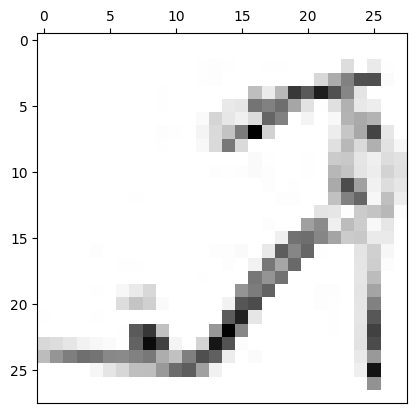

In [ ]:
# Show an image using the show function.
show(train_x[8])

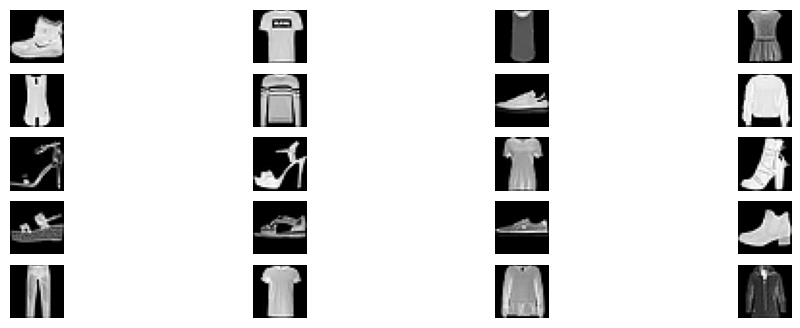

In [ ]:

# Show images in the data
import matplotlib.pyplot as plt
import numpy as np

# train_x is a list or array of images
num_images_to_display = 20  # Display the first 20 images
images_to_display = train_x[:num_images_to_display]  # Select the first 20 images

# Calculate the number of rows and columns for the 5x4 grid
num_rows = 5  # Number of rows in the grid
num_columns = 4  # Number of columns in the grid

# Create a subplot grid for displaying images
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 4))  # Figure size

# Loop through and display the selected images
for i, ax in enumerate(axes.flat):
    ax.imshow(images_to_display[i], cmap='gray')  # Images are grayscale
    ax.axis('off')  # Turn off axis labels

plt.show()



In [ ]:
# Make the console wide enough to read all the pixels.
np.core.arrayprint._line_width = 5
# Print the matrix of values in the first image
print(train_x[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

<p>Now that we've imported the data, we'll need to start importing what we need from Keras to build our network. Below is a basic network. Note that the images are greyscale, so there is no color channel like there is in some of the other datasets.</p>

<p>Also, since there's no color channel, we'll use "1D" layers not "2D" layers as are used when we have channels for colors.</p>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, BatchNormalization, Flatten, Dense

<p>Now it's time for us to start building the network. Build below is a sample network you can play with as a starting point for your assignment. Feel free to expand on this, or start your own from scratch!</p>

In [ ]:
# First Layer
model = Sequential()
model.add(Conv1D(filters = 256, kernel_size = 5, input_shape = (28, 28)))
model.add(MaxPooling1D(pool_size = 3))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Second Layer
model.add(Conv1D(filters = 200, kernel_size = 5))
model.add(MaxPooling1D(pool_size = 3))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Third Layer
#model.add(Conv1D(filters = 64, kernel_size = 2))
#model.add(MaxPooling1D(pool_size = 2))
#model.add(Dropout(0.3))
#model.add(BatchNormalization())

# Flaten the model
model.add(Flatten())
model.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tensorflow.keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

In [ ]:
model.fit(train_x, train_y, epochs = 40, batch_size = 20000)

Epoch 1/40
3/3 [==============================] - 4s 230ms/step - loss: 2.9953 - accuracy: 0.1126
Epoch 2/40
3/3 [==============================] - 1s 227ms/step - loss: 2.9804 - accuracy: 0.1156
Epoch 3/40
3/3 [==============================] - 1s 228ms/step - loss: 2.9760 - accuracy: 0.1162
Epoch 4/40
3/3 [==============================] - 1s 230ms/step - loss: 2.9618 - accuracy: 0.1168
Epoch 5/40
3/3 [==============================] - 1s 238ms/step - loss: 2.9492 - accuracy: 0.1177
Epoch 6/40
3/3 [==============================] - 1s 229ms/step - loss: 2.9390 - accuracy: 0.1190
Epoch 7/40
3/3 [==============================] - 1s 233ms/step - loss: 2.9181 - accuracy: 0.1228
Epoch 8/40
3/3 [==============================] - 1s 232ms/step - loss: 2.9118 - accuracy: 0.1220
Epoch 9/40
3/3 [==============================] - 1s 236ms/step - loss: 2.8944 - accuracy: 0.1267
Epoch 10/40
3/3 [==============================] - 1s 230ms/step - loss: 2.8876 - accuracy: 0.1251
Epoch 11/40
3/3 [==

<p>Now that we've trained the network, lets see how well it works on some unseen data!</p>

In [ ]:
score = model.evaluate(test_x, test_y)
print('\nloss is: ' + str(score[0]))
print('accuracy is: ' + str(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.6976 - accuracy: 0.7612

loss is: 0.6976090669631958
accuracy is: 0.7612000107765198


In [ ]:
# Print the first layer
print(model.layers[0])

In [ ]:
# Print the initial input shape
print(model.layers[0].input_shape)

(None, 28, 28)


In [ ]:
# By using the .output_shape method, we can see the impact that layer has on the dimensions of our matrix.
# Oh look - the final dimension is now the same as our "kernel_size" argument.
# and we lost 1 from the original rows argument.
print(model.layers[0].output_shape)

(None, 19, 256)


313/313 [==============================] - 1s 2ms/step


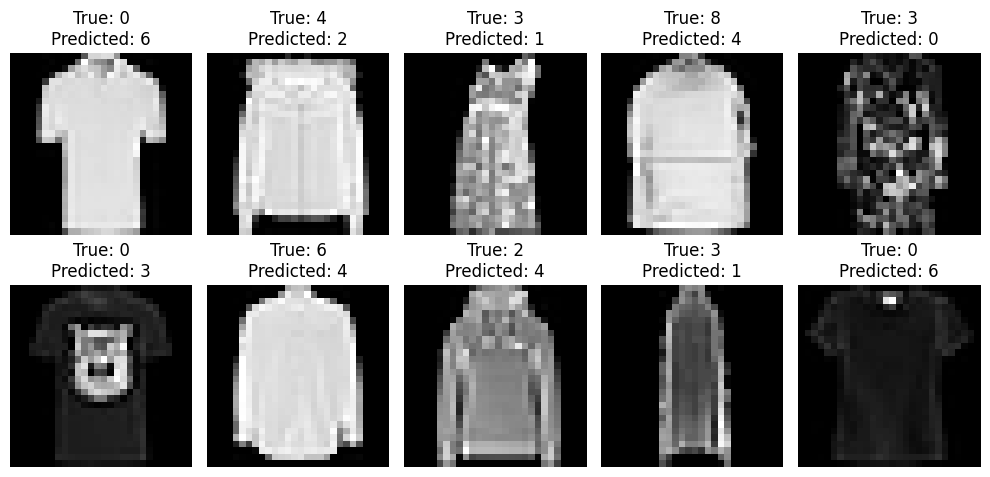

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Make predictions using the trained model on the test data
predictions = model.predict(test_x)

# Convert one-hot encoded predictions back to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_y, axis=1)

# Calculate errors
errors = (predicted_labels != true_labels)

# Get the indices of misclassified examples
misclassified_indices = np.where(errors)[0]

# Plot a random sample of misclassified images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    index = np.random.choice(misclassified_indices)
    plt.imshow(test_x[index], cmap='gray')
    plt.title(f'True: {true_labels[index]}\nPredicted: {predicted_labels[index]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Epoch 1/20
375/375 [==============================] - 4s 6ms/step - loss: 2.5649 - accuracy: 0.1933 - val_loss: 1.8623 - val_accuracy: 0.3694
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 1.9235 - accuracy: 0.3474 - val_loss: 1.4410 - val_accuracy: 0.5050
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 1.5681 - accuracy: 0.4581 - val_loss: 1.2065 - val_accuracy: 0.5736
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 1.3590 - accuracy: 0.5262 - val_loss: 1.0653 - val_accuracy: 0.6156
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 1.2298 - accuracy: 0.5689 - val_loss: 0.9706 - val_accuracy: 0.6475
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 1.1410 - accuracy: 0.6006 - val_loss: 0.9063 - val_accuracy: 0.6680
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 1.0759 - accuracy: 0.6214 - val_loss: 0.8600 - val_accuracy: 0.6848
Epoch 

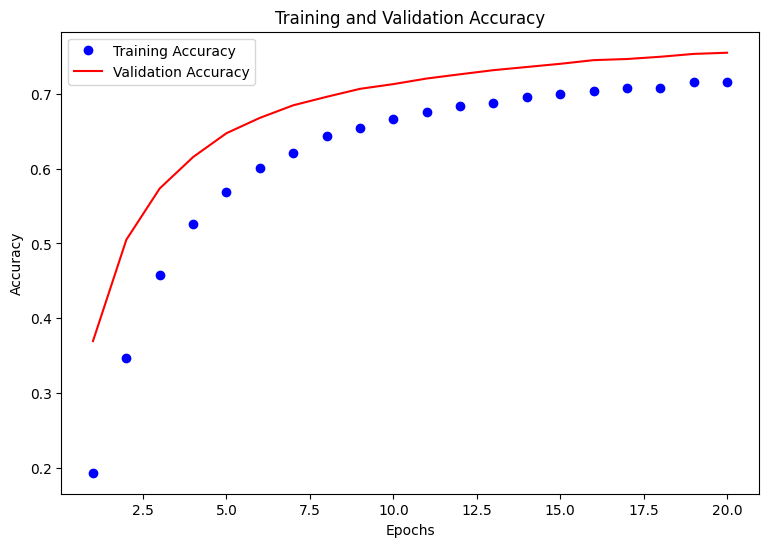

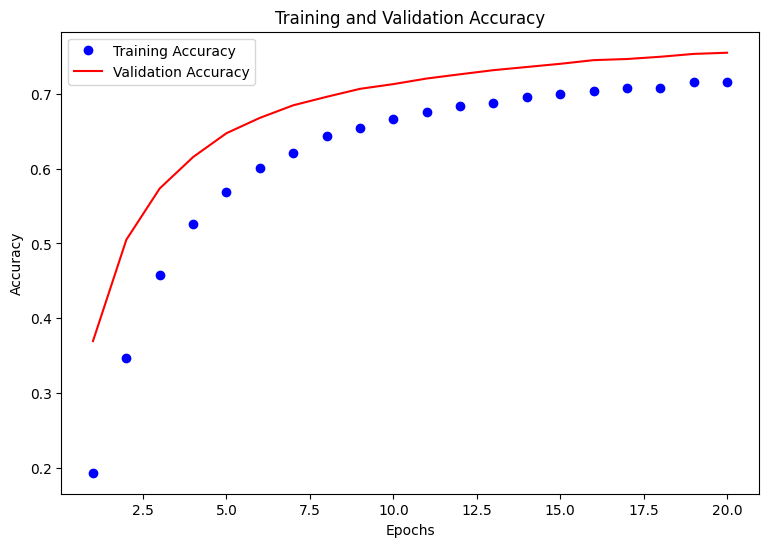

In [ ]:
import numpy as np
import pandas as pd
import os
import tarfile
import tensorflow.keras
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt  # Import Matplotlib for plotting

(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
train_y = tensorflow.keras.utils.to_categorical(train_y, 10)
test_y = tensorflow.keras.utils.to_categorical(test_y, 10)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, BatchNormalization, Flatten, Dense

# First Layer
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=5, input_shape=(28, 28)))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Second Layer (You can uncomment and modify this layer if needed)
model.add(Conv1D(filters=128, kernel_size=5))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Third Layer (You can uncomment and modify this layer if needed)
# model.add(Conv1D(filters=64, kernel_size=1))
# model.add(MaxPooling1D(pool_size=1))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())

# Flatten the model
model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=tensorflow.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Train the model and collect loss values
history = model.fit(train_x, train_y, epochs=20, batch_size=128, validation_split=0.2)

# Extract accuracy values from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create an accuracy plot line graph
epochs = range(1, len(training_accuracy) + 1)
plt.figure(figsize=(9, 6))
plt.plot(epochs, training_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Create an accuracy plot line graph
epochs = range(1, len(training_accuracy) + 1)
plt.figure(figsize=(9, 6))
plt.plot(epochs, training_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r-', label='Validation Accuracy')  # Corrected line style
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import os
import tarfile
import tensorflow.keras
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
train_y = tensorflow.keras.utils.to_categorical(train_y, 10)
test_y = tensorflow.keras.utils.to_categorical(test_y, 10)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, BatchNormalization, Flatten, Dense

# First Layer
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=5, input_shape=(28, 28)))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Second Layer (You can uncomment and modify this layer if needed)
model.add(Conv1D(filters=128, kernel_size=5))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Third Layer (You can uncomment and modify this layer if needed)
# model.add(Conv1D(filters=64, kernel_size=1))
# model.add(MaxPooling1D(pool_size=1))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())

# Flatten the model
model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=tensorflow.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Train the model and collect loss values
history = model.fit(train_x, train_y, epochs=60, batch_size=128, validation_split=0.2)

# Extract accuracy values from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Calculate test accuracy
test_loss, test_accuracy = model.evaluate(test_x, test_y)

# Create an accuracy plot line graph
epochs = range(1, len(training_accuracy) + 1)
plt.figure(figsize=(9, 6))
plt.plot(epochs, training_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/60
375/375 [==============================] - 5s 8ms/step - loss: 2.4914 - accuracy: 0.1964 - val_loss: 1.7958 - val_accuracy: 0.3754
Epoch 2/60
375/375 [==============================] - 2s 6ms/step - loss: 1.8497 - accuracy: 0.3563 - val_loss: 1.3871 - val_accuracy: 0.5427
Epoch 3/60
375/375 [==============================] - 2s 6ms/step - loss: 1.5249 - accuracy: 0.4609 - val_loss: 1.1796 - val_accuracy: 0.6087
Epoch 4/60
375/375 [==============================] - 2s 6ms/step - loss: 1.3400 - accuracy: 0.5247 - val_loss: 1.0579 - val_accuracy: 0.6438
Epoch 5/60
375/375 [==============================] - 2s 6ms/step - loss: 1.2269 - accuracy: 0.5672 - val_loss: 0.9793 - val_accuracy: 0.6665
Epoch 6/60
375/375 [==============================] - 3s 7ms/step - loss: 1.1450 - accuracy: 0.5963 - val_loss: 0.9241 - val_accuracy: 0.6834
Epoch 7/60
375/375 [==============================] - 2s 6ms/step - loss: 1.0911 - accuracy: 0.6161 - val_loss: 0.8821 - val_accuracy: 0.6961
Epoch 